In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [52]:
# Загрузить датасет IRIS
iris = load_iris()
X = iris.data
y = iris.target

In [53]:
# Подготовить выборки: обучающую 50% и тестовую 50%, random_state = 123456
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123456)

In [54]:
# Настройка KNN классификатора
classifier = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)})

In [55]:
# Лучший классификатор и параметры
best_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_

In [56]:
# Оценка точности на тестовой выборке
y_pred = best_classifier.predict(X_test)
accuracy_improved = accuracy_score(y_test, y_pred)

In [57]:
# Функция для отображения разделяющей границы классификатора
def plot_decision_boundary(classifier, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

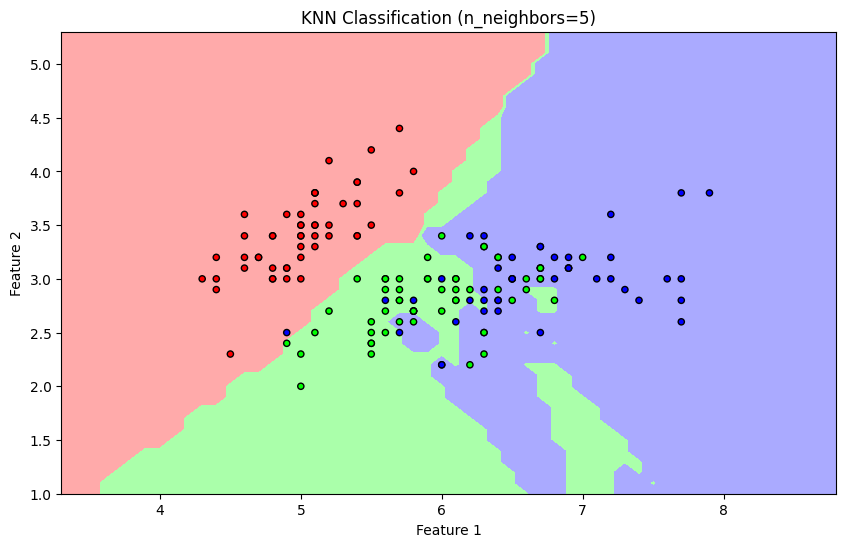

In [58]:
# Отрисовка графика для лучшего классификатора
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]
best_classifier.fit(X_train_2d, y_train) # Обучение на двух признаках для визуализации
plot_decision_boundary(best_classifier, np.vstack([X_train_2d, X_test_2d]), np.hstack([y_train, y_test]), 
                       f'KNN Classification (n_neighbors={best_params["n_neighbors"]})')
plt.show()

In [59]:
# Вывод результатов
print(f"Лучшие параметры: {best_params}")
print(f"Улучшенная точность: {accuracy_improved * 100:.2f}%")

Лучшие параметры: {'n_neighbors': 5}
Улучшенная точность: 97.33%
